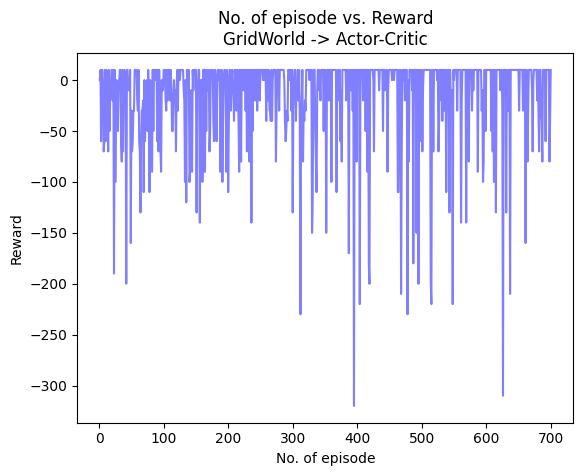

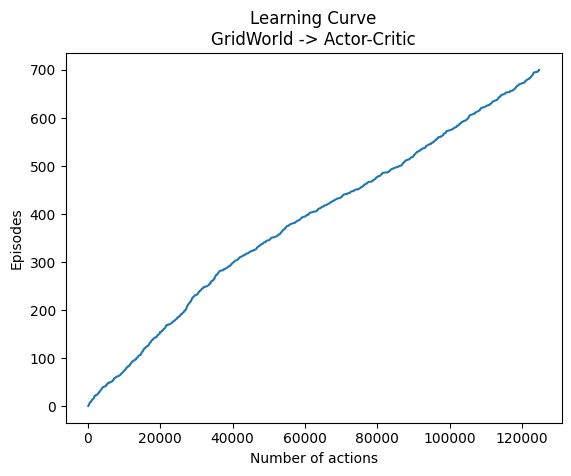

In [5]:
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

states = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 
          's18', 's19', 's20', 's21', 's22', 's23', 's24']
states_feature = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
actions = ['a1', 'a2', 'a3', 'a4'] #up, down, right, left

transition = {
    's0': {
        'a1': {'s0': 0.95, 's1': 0.05},
        'a2': {'s5': 0.8, 's1': 0.05, 's0': 0.15},
        'a3': {'s1': 0.8, 's0': 0.15, 's5': 0.05},
        'a4': {'s0': 0.95, 's5': 0.05}
    },
    's1': {
        'a1': {'s1': 0.9, 's2': 0.05, 's0': 0.05},
        'a2': {'s6': 0.8, 's2': 0.05, 's0': 0.05, 's1': 0.1},
        'a3': {'s2': 0.8, 's1': 0.15, 's6': 0.05},
        'a4': {'s0': 0.8, 's1': 0.15, 's6': 0.05}
    },
    's2': {
        'a1': {'s2': 0.9, 's3': 0.05, 's1': 0.05},
        'a2': {'s7': 0.8, 's3': 0.05, 's1': 0.05, 's2': 0.1},
        'a3': {'s3': 0.8, 's2': 0.15, 's7': 0.05},
        'a4': {'s1': 0.8, 's2': 0.15, 's7': 0.05}
    },
    's3': {
        'a1': {'s3': 0.9, 's4': 0.05, 's2': 0.05},
        'a2': {'s8': 0.8, 's4': 0.05, 's2': 0.05, 's3': 0.1},
        'a3': {'s4': 0.8, 's3': 0.15, 's8': 0.05},
        'a4': {'s2': 0.8, 's3': 0.15, 's8': 0.05}
    },
    's4': {
        'a1': {'s4': 0.95, 's3': 0.05},
        'a2': {'s9': 0.8, 's4': 0.15, 's3': 0.05},
        'a3': {'s4': 0.95, 's9': 0.05},
        'a4': {'s3': 0.8, 's4': 0.15, 's9': 0.05}
    },
    's5': {
        'a1': {'s0': 0.8, 's6': 0.05, 's5': 0.15},
        'a2': {'s10': 0.8, 's6': 0.05, 's5': 0.15},
        'a3': {'s6': 0.8, 's0': 0.05, 's10': 0.05, 's5': 0.1},
        'a4': {'s5': 0.9, 's0': 0.05, 's10': 0.05}
    },
    's6': {
        'a1': {'s1': 0.8, 's7': 0.05, 's5': 0.05, 's6': 0.1},
        'a2': {'s11': 0.8, 's7': 0.05, 's5': 0.05, 's6': 0.1},
        'a3': {'s7': 0.8, 's1': 0.05, 's11': 0.05, 's6': 0.1},
        'a4': {'s5': 0.8, 's1': 0.05, 's11': 0.05, 's6': 0.1}
    },
    's7': {
        'a1': {'s2': 0.8, 's8': 0.05, 's6': 0.05, 's7': 0.1},
        'a2': {'s7': 0.9, 's8': 0.05, 's6': 0.05},
        'a3': {'s8': 0.8, 's2': 0.05, 's7': 0.15},
        'a4': {'s6': 0.8, 's2': 0.05, 's7': 0.15}
    },
    's8': {
        'a1': {'s3': 0.8, 's9': 0.05, 's7': 0.05, 's8': 0.1},
        'a2': {'s13': 0.8, 's9': 0.05, 's7': 0.05, 's8': 0.1},
        'a3': {'s9': 0.8, 's3': 0.05, 's13': 0.05, 's8': 0.1},
        'a4': {'s7': 0.8, 's3': 0.05, 's13': 0.05, 's8': 0.1}
    },
    's9': {
        'a1': {'s4': 0.8, 's9': 0.15, 's8': 0.05},
        'a2': {'s14': 0.8, 's9': 0.15, 's8': 0.05},
        'a3': {'s9': 0.9, 's4': 0.05, 's14': 0.05},
        'a4': {'s8': 0.8, 's4': 0.05, 's14': 0.05, 's9': 0.1}
    },
    's10': {
        'a1': {'s5': 0.8, 's11': 0.05, 's10': 0.15},
        'a2': {'s15': 0.8, 's11': 0.05, 's10': 0.15},
        'a3': {'s11': 0.8, 's5': 0.05, 's15': 0.05, 's10': 0.1},
        'a4': {'s10': 0.9, 's5': 0.05, 's15': 0.05}
    },
    's11': {
        'a1': {'s6': 0.8, 's11': 0.15, 's10': 0.05},
        'a2': {'s16': 0.8, 's11': 0.15, 's10': 0.05},
        'a3': {'s11': 0.9, 's6': 0.05, 's16': 0.05},
        'a4': {'s10': 0.8, 's6': 0.05, 's16': 0.05, 's11': 0.1}
    },
    's12': {
        'a1': {'s7': 0.8, 's13': 0.05, 's11': 0.05, 's12': 0.1},
        'a2': {'s12': 0.9, 's13': 0.05, 's11': 0.05},
        'a3': {'s13': 0.8, 's7': 0.05, 's12': 0.15},
        'a4': {'s11': 0.8, 's7': 0.05, 's12': 0.15}
    },
    's13': {
        'a1': {'s8': 0.8, 's14': 0.05, 's13': 0.15},
        'a2': {'s18': 0.8, 's14': 0.05, 's13': 0.15},
        'a3': {'s14': 0.8, 's8': 0.05, 's18': 0.05, 's13': 0.1},
        'a4': {'s13': 0.9, 's8': 0.05, 's18': 0.05}
    },
    's14': {
        'a1': {'s9': 0.8, 's14': 0.15, 's13': 0.05},
        'a2': {'s19': 0.8, 's14': 0.15, 's13': 0.05},
        'a3': {'s14': 0.9, 's9': 0.05, 's19': 0.05},
        'a4': {'s13': 0.8, 's9': 0.05, 's19': 0.05, 's14': 0.1}
    },
    's15': {
        'a1': {'s10': 0.8, 's16': 0.05, 's15': 0.15},
        'a2': {'s20': 0.8, 's16': 0.05, 's15': 0.15},
        'a3': {'s16': 0.8, 's10': 0.05, 's20': 0.05, 's15': 0.1},
        'a4': {'s15': 0.9, 's10': 0.05, 's20': 0.05}
    },
    's16': {
        'a1': {'s11': 0.8, 's16': 0.15, 's15': 0.05},
        'a2': {'s21': 0.8, 's16': 0.15, 's15': 0.05},
        'a3': {'s16': 0.9, 's11': 0.05, 's21': 0.05},
        'a4': {'s15': 0.8, 's11': 0.05, 's21': 0.05, 's16': 0.1}
    },
    's17': {
        'a1': {'s17': 0.9, 's18': 0.05, 's16': 0.05},
        'a2': {'s22': 0.8, 's18': 0.05, 's16': 0.05, 's17': 0.1},
        'a3': {'s18': 0.8, 's17': 0.15, 's22': 0.05},
        'a4': {'s16': 0.8, 's17': 0.15, 's22': 0.05}
    },
    's18': {
        'a1': {'s13': 0.8, 's19': 0.05, 's18': 0.15},
        'a2': {'s23': 0.8, 's19': 0.05, 's18': 0.15},
        'a3': {'s19': 0.8, 's13': 0.05, 's23': 0.05, 's18': 0.1},
        'a4': {'s18': 0.9, 's13': 0.05, 's23': 0.05}
    },
    's19': {
        'a1': {'s14': 0.8, 's19': 0.15, 's18': 0.05},
        'a2': {'s24': 0.8, 's14': 0.15, 's18': 0.05},
        'a3': {'s19': 0.9, 's14': 0.05, 's24': 0.05},
        'a4': {'s18': 0.8, 's14': 0.05, 's24': 0.05, 's19': 0.1}
    },
    's20': {
        'a1': {'s15': 0.8, 's21': 0.05, 's20': 0.15},
        'a2': {'s20': 0.95, 's21': 0.05},
        'a3': {'s21': 0.8, 's15': 0.05, 's20': 0.15},
        'a4': {'s20': 0.95, 's15': 0.05}
    },
    's21': {
        'a1': {'s16': 0.8, 's22': 0.05, 's20': 0.05, 's21': 0.1},
        'a2': {'s21': 0.9, 's22': 0.05, 's20': 0.05},
        'a3': {'s22': 0.8, 's16': 0.05, 's21': 0.15},
        'a4': {'s20': 0.8, 's16': 0.05, 's21': 0.15}
    },
    's22': {
        'a1': {'s22': 0.9, 's23': 0.05, 's21': 0.05},
        'a2': {'s22': 0.9, 's23': 0.05, 's21': 0.05},
        'a3': {'s23': 0.8, 's22': 0.2},
        'a4': {'s21': 0.8, 's22': 0.2}
    },
    's23': {
        'a1': {'s18': 0.8, 's24': 0.05, 's22': 0.05, 's23': 0.1},
        'a2': {'s23': 0.9, 's24': 0.05, 's22': 0.05},
        'a3': {'s24': 0.8, 's18': 0.05, 's23': 0.15},
        'a4': {'s22': 0.8, 's18': 0.05, 's23': 0.15}
    },
    's24': {
        'a1': {'s19': 0.8, 's24': 0.15, 's23': 0.05},
        'a2': {'s24': 0.95, 's23': 0.05},
        'a3': {'s24': 0.95, 's19': 0.05},
        'a4': {'s23': 0.8, 's19': 0.05, 's24': 0.15}
    }
}
reward_dict = {
    's0': {
        'a1': {'s0': 0, 's1': 0},
        'a2': {'s5': 0, 's1': 0, 's0': 0},
        'a3': {'s1': 0, 's0': 0, 's5': 0},
        'a4': {'s0': 0, 's5': 0}
    },
    's1': {
        'a1': {'s1': 0, 's2': 0, 's0': 0},
        'a2': {'s6': 0, 's2': 0, 's0': 0, 's1': 0},
        'a3': {'s2': 0, 's1': 0, 's6': 0},
        'a4': {'s0': 0, 's1': 0, 's6': 0}
    },
    's2': {
        'a1': {'s2': 0, 's3': 0, 's1': 0},
        'a2': {'s7': 0, 's3': 0, 's1': 0, 's2': 0},
        'a3': {'s3': 0, 's2': 0, 's7': 0},
        'a4': {'s1': 0, 's2': 0, 's7': 0}
    },
    's3': {
        'a1': {'s3': 0, 's4': 0, 's2': 0},
        'a2': {'s8': 0, 's4': 0, 's2': 0, 's3': 0},
        'a3': {'s4': 0, 's3': 0, 's8': 0},
        'a4': {'s2': 0, 's3': 0, 's8': 0}
    },
    's4': {
        'a1': {'s4': 0, 's3': 0},
        'a2': {'s9': 0, 's4': 0, 's3': 0},
        'a3': {'s4': 0, 's9': 0},
        'a4': {'s3': 0, 's4': 0, 's9': 0}
    },
    's5': {
        'a1': {'s0': 0, 's6': 0, 's5': 0},
        'a2': {'s10': 0, 's6': 0, 's5': 0},
        'a3': {'s6': 0, 's0': 0, 's10': 0, 's5': 0},
        'a4': {'s5': 0, 's0': 0, 's10': 0}
    },
    's6': {
        'a1': {'s1': 0, 's7': 0, 's5': 0, 's6': 0},
        'a2': {'s11': 0, 's7': 0, 's5': 0, 's6': 0},
        'a3': {'s7': 0, 's1': 0, 's11': 0, 's6': 0},
        'a4': {'s5': 0, 's1': 0, 's11': 0, 's6': 0}
    },
    's7': {
        'a1': {'s2': 0, 's8': 0, 's6': 0, 's7': 0},
        'a2': {'s7': 0, 's8': 0, 's6': 0},
        'a3': {'s8': 0, 's2': 0, 's7': 0},
        'a4': {'s6': 0, 's2': 0, 's7': 0}
    },
    's8': {
        'a1': {'s3': 0, 's9': 0, 's7': 0, 's8': 0},
        'a2': {'s13': 0, 's9': 0, 's7': 0, 's8': 0},
        'a3': {'s9': 0, 's3': 0, 's13': 0, 's8': 0},
        'a4': {'s7': 0, 's3': 0, 's13': 0, 's8': 0}
    },
    's9': {
        'a1': {'s4': 0, 's9': 0, 's8': 0},
        'a2': {'s14': 0, 's9': 0, 's8': 0},
        'a3': {'s9': 0, 's4': 0, 's14': 0},
        'a4': {'s8': 0, 's4': 0, 's14': 0, 's9': 0}
    },
    's10': {
        'a1': {'s5': 0, 's11': 0, 's10': 0},
        'a2': {'s15': 0, 's11': 0, 's10': 0},
        'a3': {'s11': 0, 's5': 0, 's15': 0, 's10': 0},
        'a4': {'s10': 0, 's5': 0, 's15': 0}
    },
    's11': {
        'a1': {'s6': 0, 's11': 0, 's10': 0},
        'a2': {'s16': 0, 's11': 0, 's10': 0},
        'a3': {'s11': 0, 's6': 0, 's16': 0},
        'a4': {'s10': 0, 's6': 0, 's16': 0, 's11': 0}
    },
    's12': {
        'a1': {'s7': 0, 's13': 0, 's11': 0, 's12': 0},
        'a2': {'s12': 0, 's13': 0, 's11': 0},
        'a3': {'s13': 0, 's7': 0, 's12': 0},
        'a4': {'s11': 0, 's7': 0, 's12': 0}
    },
    's13': {
        'a1': {'s8': 0, 's14': 0, 's13': 0},
        'a2': {'s18': 0, 's14': 0, 's13': 0},
        'a3': {'s14': 0, 's8': 0, 's18': 0, 's13': 0},
        'a4': {'s13': 0, 's8': 0, 's18': 0}
    },
    's14': {
        'a1': {'s9': 0, 's14': 0, 's13': 0},
        'a2': {'s19': 0, 's14': 0, 's13': 0},
        'a3': {'s14': 0, 's9': 0, 's19': 0},
        'a4': {'s13': 0, 's9': 0, 's19': 0, 's14': 0}
    },
    's15': {
        'a1': {'s10': 0, 's16': 0, 's15': 0},
        'a2': {'s20': 0, 's16': 0, 's15': 0},
        'a3': {'s16': 0, 's10': 0, 's20': 0, 's15': 0},
        'a4': {'s15': 0, 's10': 0, 's20': 0}
    },
    's16': {
        'a1': {'s11': 0, 's16': 0, 's15': 0},
        'a2': {'s21': 0, 's16': 0, 's15': 0},
        'a3': {'s16': 0, 's11': 0, 's21': 0},
        'a4': {'s15': 0, 's11': 0, 's21': 0, 's16': 0}
    },
    's17': {
        'a1': {'s17': 0, 's18': 0, 's16': 0},
        'a2': {'s22': -10, 's18': 0, 's16': 0, 's17': 0},
        'a3': {'s18': 0, 's17': 0, 's22': -10},
        'a4': {'s16': 0, 's17': 0, 's22': -10}
    },
    's18': {
        'a1': {'s13': 0, 's19': 0, 's18': 0},
        'a2': {'s23': 0, 's19': 0, 's18': 0},
        'a3': {'s19': 0, 's13': 0, 's23': 0, 's18': 0},
        'a4': {'s18': 0, 's13': 0, 's23': 0}
    },
    's19': {
        'a1': {'s14': 0, 's19': 0, 's18': 0},
        'a2': {'s24': 10, 's14': 0, 's18': 0},
        'a3': {'s19': 0, 's14': 0, 's24': 10},
        'a4': {'s18': 0, 's14': 0, 's24': 10, 's19': 0}
    },
    's20': {
        'a1': {'s15': 0, 's21': 0, 's20': 0},
        'a2': {'s20': 0, 's21': 0},
        'a3': {'s21': 0, 's15': 0, 's20': 0},
        'a4': {'s20': 0, 's15': 0}
    },
    's21': {
        'a1': {'s16': 0, 's22': -10, 's20': 0, 's21': 0},
        'a2': {'s21': 0, 's22': -10, 's20': 0},
        'a3': {'s22': -10, 's16': 0, 's21': 0},
        'a4': {'s20': 0, 's16': 0, 's21': 0}
    },
    's22': {
        'a1': {'s22': -10, 's23': 0, 's21': 0},
        'a2': {'s22': -10, 's23': 0, 's21': 0},
        'a3': {'s23': 0, 's22': -10},
        'a4': {'s21': 0, 's22': -10}
    },
    's23': {
        'a1': {'s18': 0, 's24': 10, 's22': -10, 's23': 0},
        'a2': {'s23': 0, 's24': 10, 's22': -10},
        'a3': {'s24': 10, 's18': 0, 's23': 0},
        'a4': {'s22': -10, 's18': 0, 's23': 0}
    },
    's24': {
        'a1': {'s19': 0, 's24': 0, 's23': 0},
        'a2': {'s24': 0, 's23': 0},
        'a3': {'s24': 0, 's19': 0},
        'a4': {'s23': 0, 's19': 0, 's24': 0}
    }
}

def initialize_weights(order):
    k = 2 #need to change depending on state features when environment changes
    weight_count = (order + 1) ** k
    weights = np.zeros((weight_count,))
    return weights

def initialize_pweights(order, num_actions):
    k = 2 #need to change depending on state features when environment changes
    weight_count = (order + 1) ** k
    weights = np.zeros((num_actions, weight_count))
    return weights

def valuefunction_state(vweights, value_feature):  # need to initialize for value wts
    return np.dot(vweights, value_feature)

def policy(theta, norm_state):
    policy_list = []
    policy_features = fourier_function(order, norm_state)
    for i in range(4):  # need to change depending on actions in environment
        each_action_wt = theta[i]
        # print('each_action_wt', each_action_wt)

        each_action_phi = policy_features
        # print('each_action_phi', each_action_phi)

        each_action_value = np.dot(each_action_wt, each_action_phi)
        # print('each_action_value', each_action_value)

        policy_list.append(each_action_value)
    return policy_list

def normalize(state):
    cos_theta1, sin_theta1, cos_theta2, sin_theta2, av_theta1, av_theta2 = state

    norm = []
    cos_theta1 = (cos_theta1 + 1) / 2
    norm.append(cos_theta1)
    sin_theta1 = (sin_theta1 + 1) / 2
    norm.append(sin_theta1)
    cos_theta2 = (cos_theta2 + 1)/ 2
    norm.append(cos_theta2)
    sin_theta2 = (sin_theta2 + 1) / 2
    norm.append(sin_theta2)
    av_theta1 = (av_theta1 + 12.567) / (2*12.567)
    norm.append(av_theta1)
    av_theta2 = (av_theta2 + 28.274) / (2*28.274)
    norm.append(av_theta2)

    return tuple(norm)

def select_action_softmax(policy, sigma):
    # policy is a list
    policy_arr = np.array(policy)

    # softMax

    numerator_values = [math.exp(sigma * x - max(sigma * policy_arr)) for x in policy_arr]

    # Calculate the denominator
    denominator_values = [math.exp(sigma * x - max(sigma * policy_arr)) for x in policy_arr]
    denominator = sum(denominator_values)

    # Calculate action probabilities
    action_probabilities = [numerator_value / denominator for numerator_value in numerator_values]

    selected_action = random.choices([1, 2, 3, 4], action_probabilities)[
        0]  # need to change depending on actions in environment --- changed to 1 to 4 for actions

    selected_action_probability = action_probabilities[selected_action-1]#since actions are a1 to a4, 

    return selected_action, selected_action_probability

def combination(order):  # need to change when environment changes
    combinations = []
    for x in range(order + 1):  # need to change when environment changes for state features since x,v,etc are specific
        for y in range(order + 1):
            combinations.append([x, y])
    return combinations


def fourier_function(order, normalized_state):
    fourier_count = (order + 1) ** len(normalized_state)  # need to change when environment changes
    fourier_features = np.zeros((fourier_count,))

    combinations_list = combination(order)

    for j in range(fourier_count):
        c_j = combinations_list[j]

        exponent = np.dot(np.array(normalized_state),
                          c_j)  # no need to transpose since state features are taken as tuples
        fourier_features[j] = np.cos(np.pi * exponent)

    return fourier_features

#convert tuple state to string state
def build_str_state(state):
    
    row = state[0]
    column = state[1]
    total_columns = 5
    
    position = row * total_columns + column
    
    # print(positions)
    state_str = 's' + str(position)
    return state_str
    
#convert index to a tuple
def build_tuple_state(index):
    
    rows = 5
    columns = 5
    result = index // columns, index % columns
    return result
    
def runEpisode(theta, w, policy_alpha, v_alpha, sigma):
    # env = gym.make('Acrobot-v1')
    
    # state = env.reset()[0]
    state = tuple(states_feature[0])
    # end = False
    # reward_episode = 0
    capital_i = 1
    total_reward = 0
    timesteps = 0
    # for _ in range(500): #timesteps
    while True:
        
        # if end or reward_episode == 500: # terminal state
        #     break
        if state == (4, 4):
            break
        # reward_episode += 1
        # norm_state = normalize(state)
        
        policy_vector = policy(theta, state) 
        action_taken, action_prob = select_action_softmax(policy_vector, sigma)

        #converting tuple state to string state
        state_str = build_str_state(state)
        #converting action to string action
        action_taken_str = 'a' + str(action_taken)
        #choose next state randomly
        transition_action_taken = transition[state_str][action_taken_str]
        selected_transition = random.choice(list(transition_action_taken.items())) #returns a tuple of (nextstate, transprobability) 
                                                                                   #for given state
        next_state_str = selected_transition[0] #string
        if next_state_str == 's12' or next_state_str == 's17':
            next_state_str = state_str
        #getting reward
        reward = reward_dict[state_str][action_taken_str][next_state_str]
        total_reward = total_reward + reward
        # next_state, reward, end, truncated, info = env.step(action_taken)

        # norm_next_state = normalize(next_state)

        next_state_tuple = build_tuple_state(int(next_state_str[1:])) #slicing s_num to get the number
        
        value_feature_nextstate = fourier_function(order, next_state_tuple)
        value_feature_state = fourier_function(order, state)
        
        delta = reward + (discount * valuefunction_state(w, value_feature_nextstate)) - \
                  valuefunction_state(w, value_feature_state)
        
        w += float(v_alpha * delta) * \
            fourier_function(order, state)

        derviative = [1 - action_prob if i == (action_taken-1) else -1 * action_prob for i in range(4)] #action_taken = 1 to 4; index is 0 to 3
        #need to change i == action_taken for another environment
        for i in range(4): # need to change when environment changes
            theta[i] += float(policy_alpha * delta * capital_i) * \
                derviative[i] * \
                fourier_function(order, state)

        capital_i *= discount
        state = next_state_tuple
        timesteps = timesteps + 1
 
    return theta, w, total_reward, timesteps

run_algo_times = 1
num_episodes = 700
alpha = 0.01
# alpha = 0.4
sigma = 1
# order = 2
order = 1
discount = 0.9

reward_list = []
action_list = []
for i in range(run_algo_times):
    run_reward = []
    start_action = [0]*(num_episodes+1)
    theta = initialize_pweights(order, 4)  # need to change when environment changes
    w = initialize_weights(order)
    p_alpha = alpha
    v_alpha = alpha
    for i in range(num_episodes):
        # print('episode', i)
        pweights, vweights, epi_rewards, timesteps = runEpisode(
            theta, w, p_alpha, v_alpha, sigma)
        # print('done')
        run_reward.append(epi_rewards)
        start_action[i+1] = start_action[i] + timesteps
    reward_list.append(run_reward)
    action_list.append(start_action)

avg_reward = np.mean(np.array(reward_list), axis=0)
std_reward = np.std(np.array(reward_list), axis=0)
avg_action_list = np.mean(action_list, axis=0)

episoderange = range(1, num_episodes + 1)
plt.errorbar(episoderange, avg_reward, yerr=std_reward, color='blue', ecolor='red', alpha=0.5)
# plt.plot(episoderange, avg_reward)
plt.title('No. of episode vs. Reward\nGridWorld -> Actor-Critic')
plt.xlabel('No. of episode')
plt.ylabel('Reward')
plt.show()


plt.plot(avg_action_list[1:], episoderange)
plt.title('Learning Curve\nGridWorld -> Actor-Critic')
plt.xlabel('Number of actions')
plt.ylabel('Episodes')
plt.show()
